In [1]:
#Data load --> cleaning ---> Stationary check ---> Model Training ---> prediction

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('/content/weather_data.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
#Data Cleaning
df = df.dropna()

df.index = pd.to_datetime(df.dt)

df = df.drop(['dt','AverageTemperatureUncertainty'], axis=1)
df.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [6]:
ts = df['AverageTemperature']
ts

,AverageTemperature
dt,
1743-11-01,6.068
1744-04-01,5.788
1744-05-01,10.644
1744-06-01,14.051
1744-07-01,16.082
...,...
2013-04-01,6.026
2013-05-01,12.774
2013-06-01,15.685


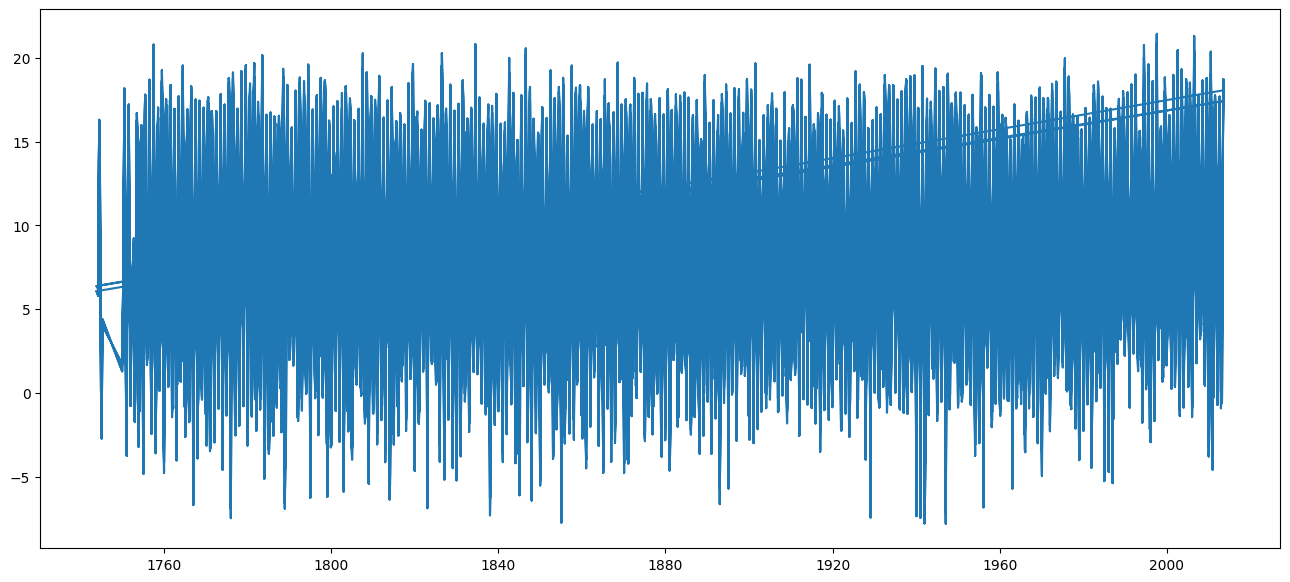

In [8]:
#Data Visualization
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(ts)
plt.show()

In [10]:
#ADF test
#Null Hypothesis - non Stationary
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(ts, autolag = 'AIC')

adfuller_test
#if p_value < 0.05 reject null hypothesis
if adfuller_test[1] < 0.05:
  print('Reject Null Hypothesis')

Reject Null Hypothesis


In [24]:
#Models
ar = ARIMA(ts, order=(1,0,0)) #(AR,Differencing,MA)
results = ar.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
predictions = results.predict('01/01/1990','01/01/1991')

In [26]:
predictions

,predicted_mean
dt,
1990-01-01,3.249051
1990-02-01,4.861838
1990-03-01,6.215947
1990-04-01,6.773228
1990-05-01,8.023367
1990-06-01,12.079040
1990-07-01,14.348087
1990-08-01,15.322912
1990-09-01,15.787036


In [27]:
#Models
ma = ARIMA(ts, order=(0,0,1)) #(AR,Differencing,MA)
results = ma.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
predictions = results.predict('01/01/1990','01/01/1991')
predictions

,predicted_mean
dt,
1990-01-01,4.771629
1990-02-01,7.404228
1990-03-01,6.610722
1990-04-01,7.766706
1990-05-01,8.040804
1990-06-01,11.675724
1990-07-01,10.959372
1990-08-01,12.450931
1990-09-01,11.713538


In [35]:
#ARMA
arma = ARIMA(ts, order=(1,0,1)) #(AR,Differencing,MA)
results = arma.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
predictions = results.predict('01/01/1990','01/01/1991')
predictions

,predicted_mean
dt,
1990-01-01,2.886489
1990-02-01,5.788033
1990-03-01,6.420826
1990-04-01,6.940727
1990-05-01,8.522871
1990-06-01,13.703937
1990-07-01,14.616826
1990-08-01,15.615955
1990-09-01,15.830710


In [33]:
#ARIMA
arima = ARIMA(ts, order=(1,1,1)) #(AR,Differencing,MA)
results = arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
predictions = results.predict('01/01/1990','01/01/1991')
predictions

,predicted_mean
dt,
1990-01-01,0.829829
1990-02-01,5.299781
1990-03-01,6.820787
1990-04-01,6.958828
1990-05-01,8.908373
1990-06-01,15.659122
1990-07-01,17.248528
1990-08-01,17.531806
1990-09-01,17.727863


In [37]:
#R2 error or MSE

In [38]:
#ACF and PACF
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ts,nlags=20)
lag_pacf = pacf(ts,nlags=20)

In [39]:
lag_acf

array([ 1.        ,  0.83165685,  0.47474604,  0.00491827, -0.45717924,
       -0.79061752, -0.91224323, -0.78979727, -0.45712295, -0.00222333,
        0.45805869,  0.79561083,  0.9220359 ,  0.79963802,  0.46219633,
        0.00436693, -0.45047697, -0.78299138, -0.90667373, -0.78845424,
       -0.46014099])

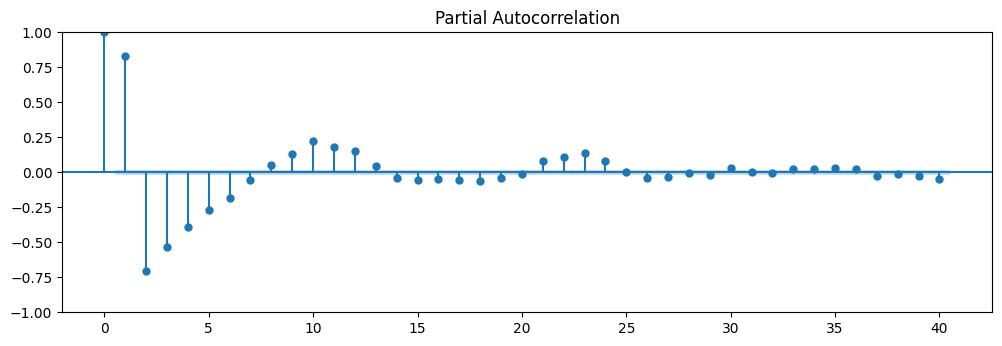

In [42]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(ts.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts.dropna(),lags=40,ax=ax2)
plt.show()